# Pengerjaan Tugas UTS Deep Learning menggunakan TensorFlow (Arsitektur MLP, Dataset RegresiUTSTelkom.csv)

# Persiapan: Instalasi library

In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow seaborn scipy


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Deep Learning dengan TensorFlow (MLP)

## 1. Import Library yang Diperlukan

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
import warnings

warnings.filterwarnings('ignore')

2025-05-03 23:50:13.699187: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 23:50:13.946937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746291014.024969   15115 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746291014.049856   15115 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746291014.232667   15115 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 2. Memuat Dataset RegresiUTSTelkom.csv

In [3]:
file_path = "./Dataset/RegresiUTSTelkom.csv"

# Load the data
def load_and_explore_data(file_path):
    # Read the data
    df = pd.read_csv(file_path, header=None)
    df = df.reset_index()

    # Print basic information
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Check data types
    print("\nData types:")
    print(df.dtypes)

    # Summary statistics
    print("\nSummary statistics:")
    print(df.describe())

    return df

df = load_and_explore_data(file_path)

df

Dataset shape: (515345, 92)

First 5 rows:
   index     0         1         2         3         4         5         6  \
0      0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905   
1      1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
2      2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
3      3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
4      4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   

          7         8  ...        81         82        83        84        85  \
0 -25.01202 -12.23257  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1   8.76630  -0.92019  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -3.27872  -2.35035  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3   5.05097 -10.34124  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4 -12.48207  -9.37636  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

 

,index,0,1,2,3,4,5,6,7,8,...,81,82,83,84,85,86,87,88,89,90
0,0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


## 3. Menganalisis Fitur


Year distribution:
0
1922        6
1924        5
1925        7
1926       19
1927       42
        ...  
2007    39404
2008    34760
2009    31038
2010     9396
2011        1
Name: count, Length: 89, dtype: int64


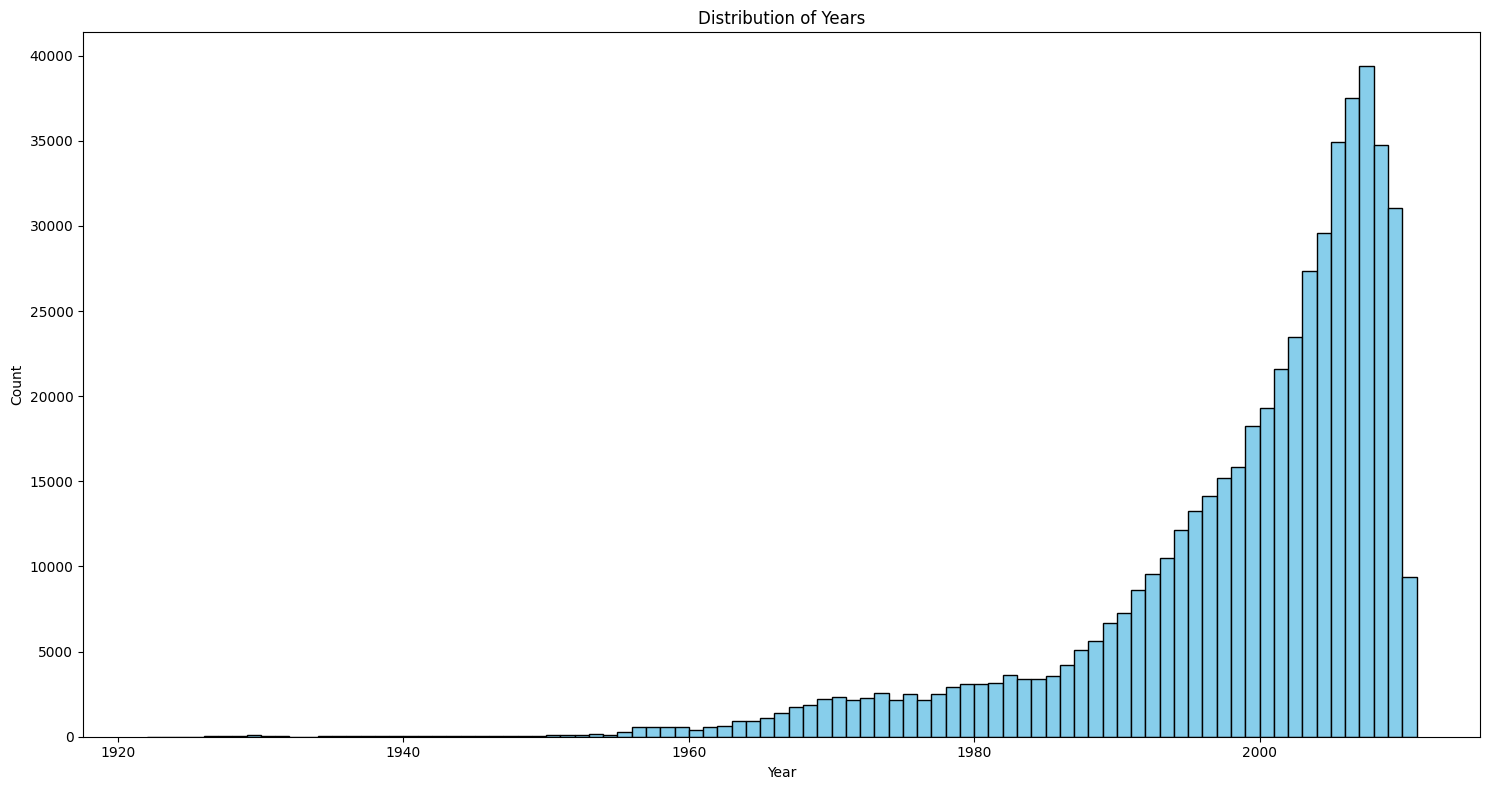

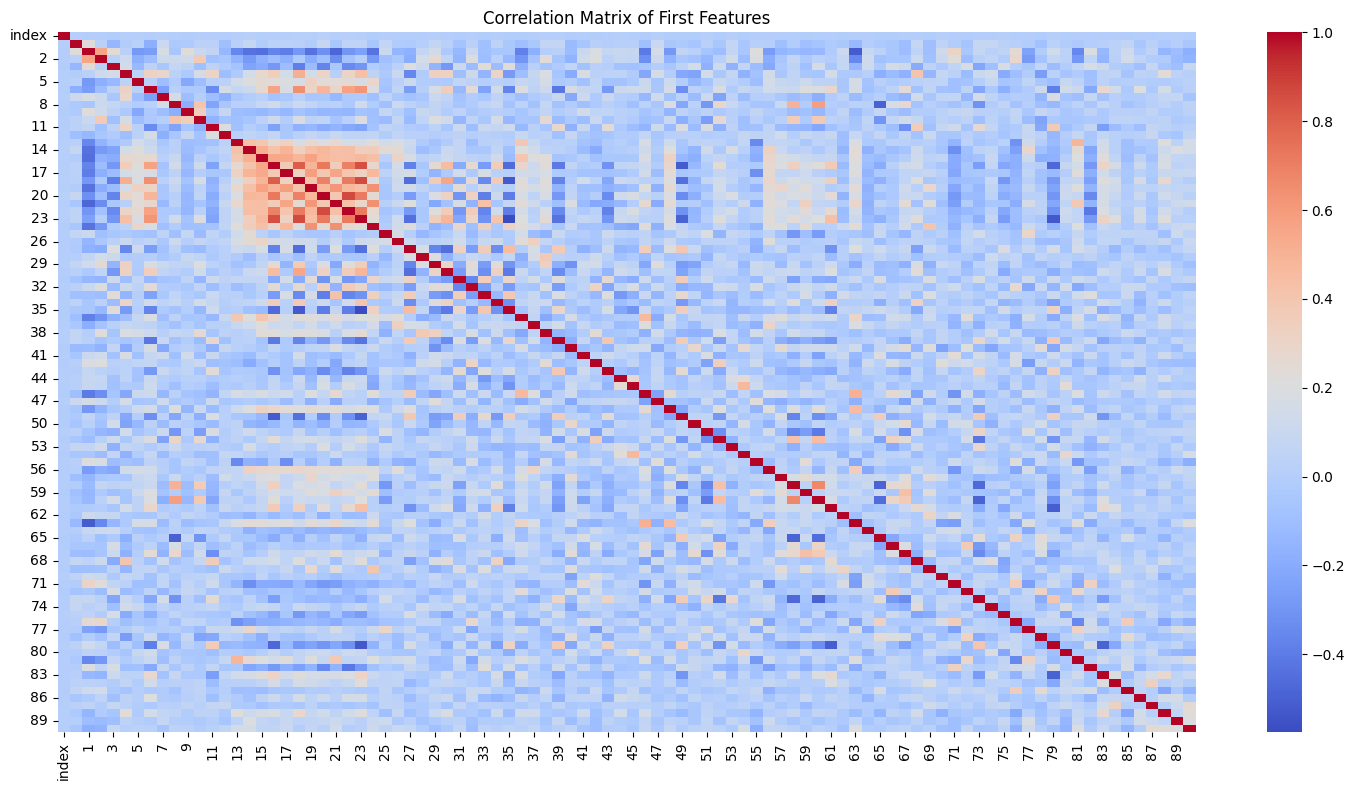

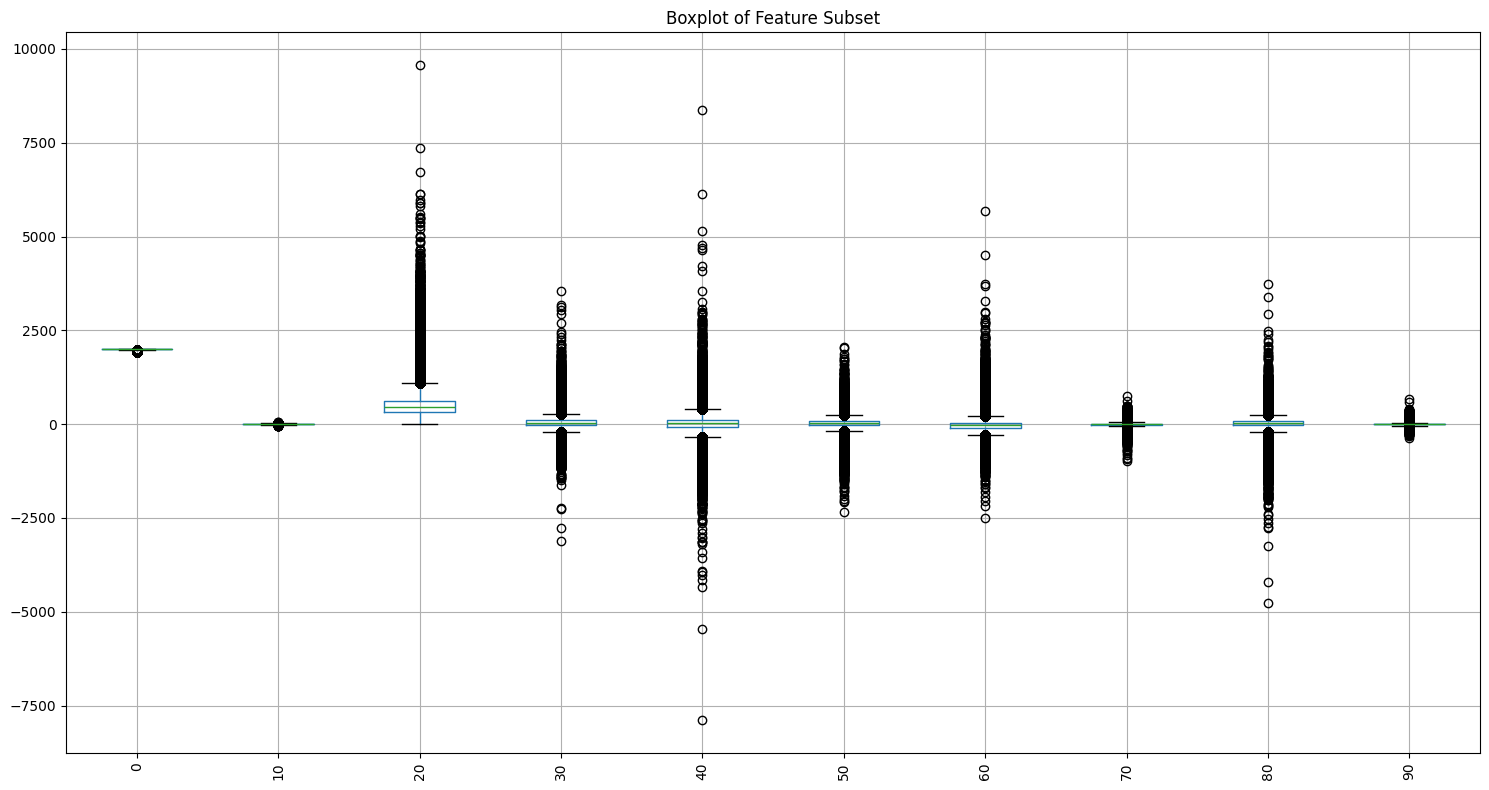

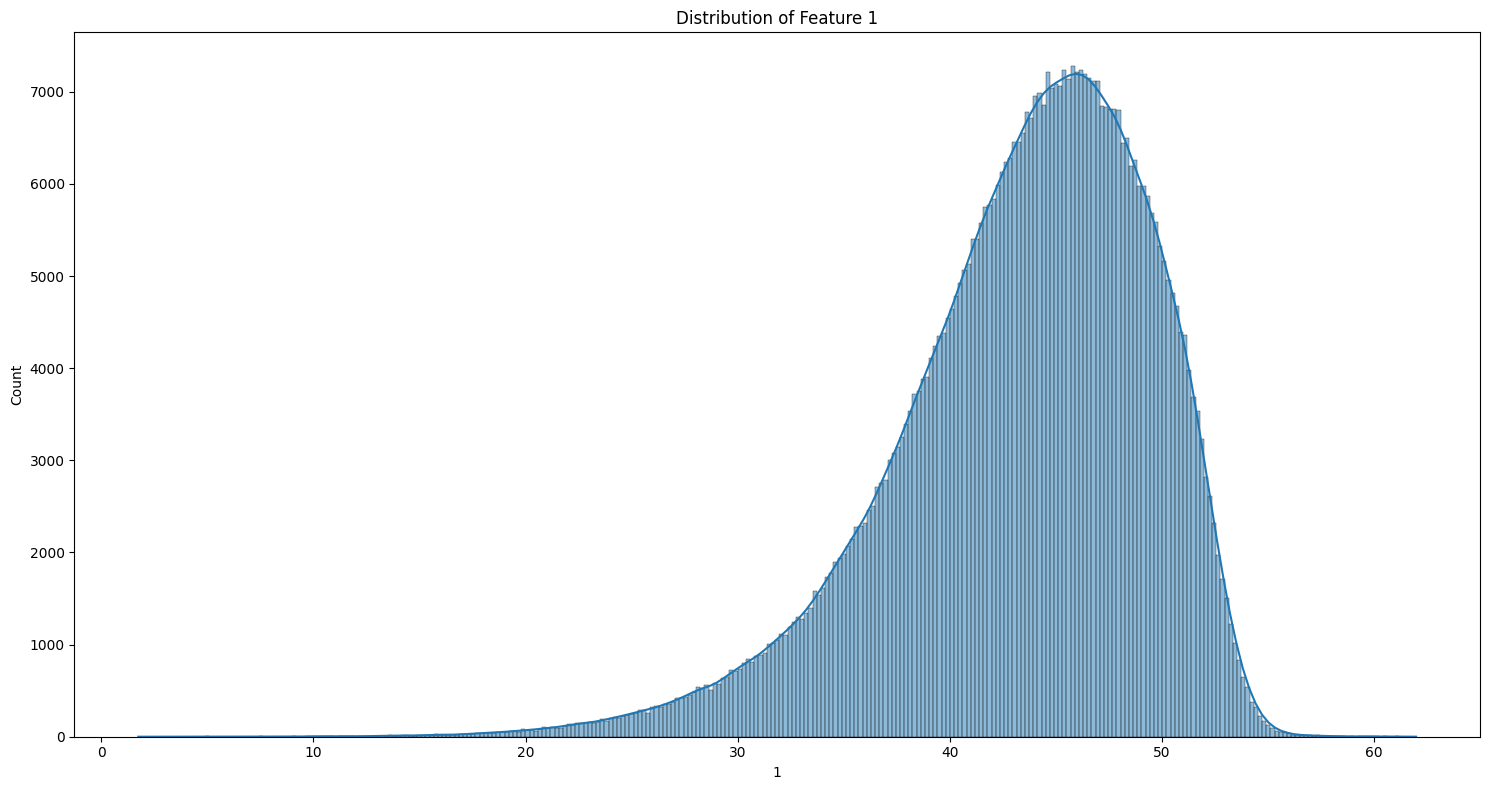

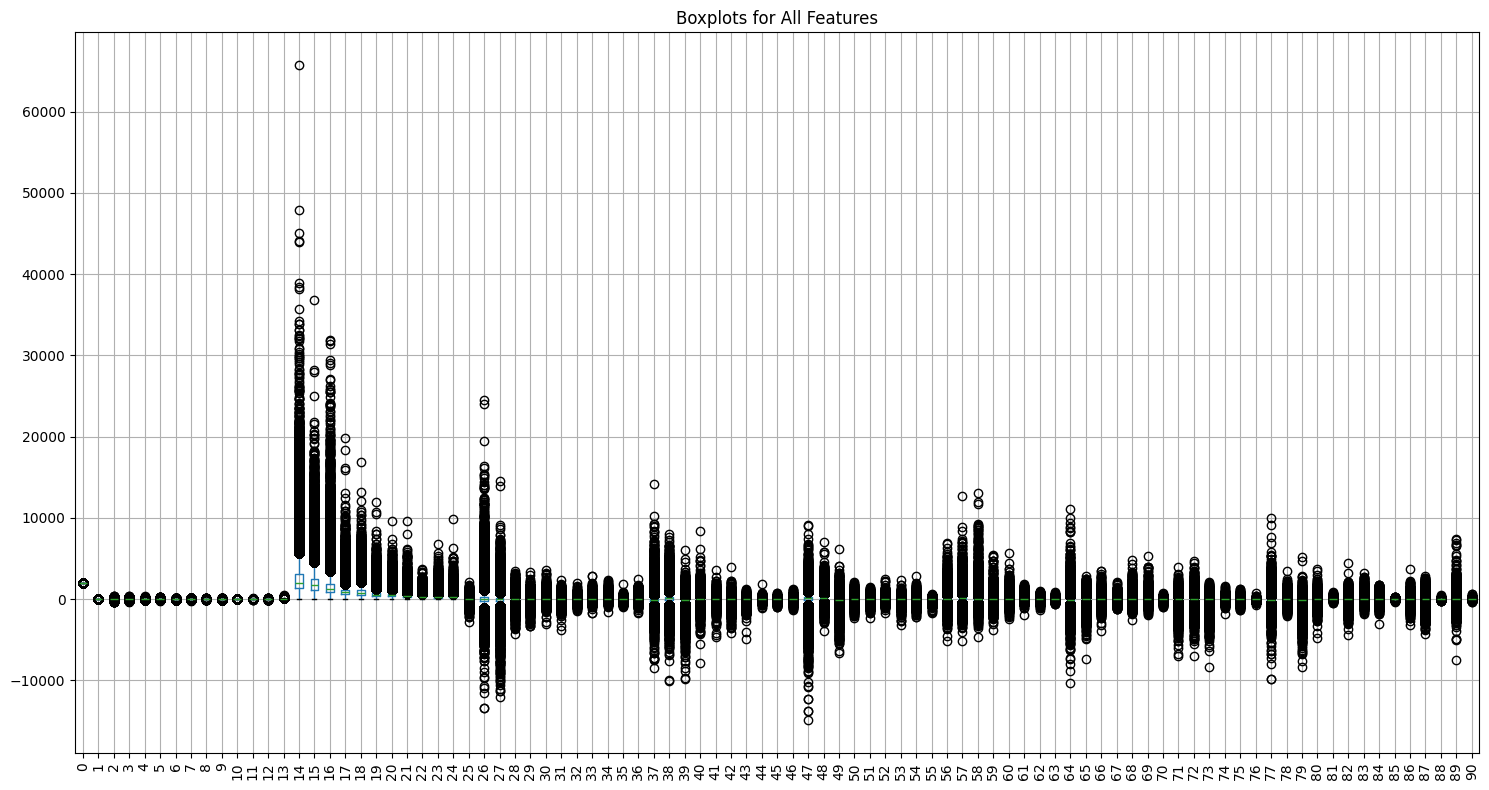

In [4]:
# Feature analysis and visualization
def analyze_features(df):
    # Separate columns by type
    year_col = df[0]  # Assuming column '0' is the year

    # Analyze year distribution
    print("\nYear distribution:")
    year_counts = year_col.value_counts().sort_index()
    print(year_counts)

    # Feature visualization
    plt.figure(figsize=(15, 8))

    # Plot distribution of years
    plt.hist(year_col, bins=len(year_counts), color='skyblue', edgecolor='black')
    plt.title('Distribution of Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('year_distribution.png')
    plt.show()

    # Check for correlations between some numeric features
    plt.figure(figsize=(15, 8))

    # Check features for correlation visualization
    features_subset = df.iloc[:, :]  # all features
    correlation = features_subset.corr()
    sns.heatmap(correlation, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix of First Features')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()

    # Examine the distribution of a few features
    plt.figure(figsize=(15, 8))

    # Take a sample of features to analyze
    feature_sample = df.iloc[:, 1::10]  # Another subset
    feature_sample.boxplot()
    plt.title('Boxplot of Feature Subset')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('boxplot_feature_subset.png')
    plt.show()

    # Distribution of the first numeric feature
    plt.figure(figsize=(15, 8))
    sns.histplot(df.iloc[:, 2], kde=True)
    plt.title(f'Distribution of Feature 1')
    plt.tight_layout()
    plt.savefig('feature_1_distribution.png')
    plt.show()

    # Additional analysis: Check for outliers in all features
    plt.figure(figsize=(15, 8))
    df.iloc[:, 1:].boxplot(figsize=(20, 10), rot=90)
    plt.title('Boxplots for All Features')
    plt.tight_layout()
    plt.savefig('boxplots_all_features.png')
    plt.show()

    return

analyze_features(df)

## 4. Menyiapkan Fungsi Feature Engineering

In [5]:
#Feature Engineering
def feature_engineering(df):
    # Create a copy to avoid modifying the original DataFrame
    df_processed = df.copy()

    # Extract the index column
    index_col = df_processed['index']

    # Extract year as a separate feature (assuming column '0' is the year)
    year = df_processed[0]

    # Calculate decade from year
    df_processed['decade'] = (year // 10) * 10

    # Normalize year (min-max scaling)
    min_year = year.min()
    max_year = year.max()
    df_processed['year_normalized'] = (year - min_year) / (max_year - min_year)

    # Create age of data feature (relative to most recent year)
    df_processed['data_age'] = max_year - year

    # Create binary feature: is_before_2000
    df_processed['is_before_2000'] = (year < 2000).astype(int)

    # Create year_category using one-hot encoding
    year_encoder = OneHotEncoder(sparse_output=False, drop='first')
    year_encoded = year_encoder.fit_transform(year.values.reshape(-1, 1))
    year_encoded_df = pd.DataFrame(
        year_encoded,
        columns=[f'year_{int(val)}' for val in year_encoder.categories_[0][1:]]
    )
    df_processed = pd.concat([df_processed, year_encoded_df], axis=1)

    # Feature transformations for numerical columns (from 1 to 90)
    numeric_features = df_processed.iloc[:, 1:91]  # Columns 1-90

    # Basic statistical features
    df_processed['mean_features'] = numeric_features.mean(axis=1)
    df_processed['median_features'] = numeric_features.median(axis=1)
    df_processed['std_features'] = numeric_features.std(axis=1)
    df_processed['min_features'] = numeric_features.min(axis=1)
    df_processed['max_features'] = numeric_features.max(axis=1)
    df_processed['range_features'] = df_processed['max_features'] - df_processed['min_features']
    df_processed['sum_features'] = numeric_features.sum(axis=1)

    # Create ratio features (between consecutive columns)
    for i in range(1, 90):
        if i < 89:  # Ensure we don't go out of bounds
            col_name = f'ratio_{i}_{i+1}'
            # Avoid division by zero
            denominator = df_processed[i+1].replace(0, np.nan)
            df_processed[col_name] = df_processed[i] / denominator
            # Fill NaN values with 0
            df_processed[col_name] = df_processed[col_name].fillna(0)

    # Group features into bins (features 1-14, 15-29, etc.)
    feature_groups = [
        (1, 15),   # Group 1: features 1-14
        (15, 30),  # Group 2: features 15-29
        (30, 45),  # Group 3: features 30-44
        (45, 60),  # Group 4: features 45-59
        (60, 75),  # Group 5: features 60-74
        (75, 90)   # Group 6: features 75-89
    ]

    for start, end in feature_groups:
        group_cols = [i for i in range(start, end)]
        group_name = f'group_{start}_{end-1}'
        df_processed[f'{group_name}_mean'] = df_processed[group_cols].mean(axis=1)
        df_processed[f'{group_name}_sum'] = df_processed[group_cols].sum(axis=1)
        df_processed[f'{group_name}_std'] = df_processed[group_cols].std(axis=1)
        df_processed[f'{group_name}_min'] = df_processed[group_cols].min(axis=1)
        df_processed[f'{group_name}_max'] = df_processed[group_cols].max(axis=1)
        df_processed[f'{group_name}_range'] = df_processed[f'{group_name}_max'] - df_processed[f'{group_name}_min']

    # Create interaction terms between the feature groups, including multiplications, ratios, and ranges
    for i in range(len(feature_groups)):
        for j in range(i+1, len(feature_groups)):
            group1_start, group1_end = feature_groups[i]
            group2_start, group2_end = feature_groups[j]
            interactions = ['sum', 'multiply', 'ratio', '2to1range', '1to2range']
        
            for interaction in interactions:
                interaction_name = f'{interaction}_{group1_start}_{group1_end}_{group2_start}_{group2_end}'
                df_processed[interaction_name] = df_processed[f'group_{group1_start}_{group1_end-1}_mean']
                if interaction == 'sum':
                    df_processed[interaction_name] += df_processed[f'group_{group2_start}_{group2_end-1}_mean']
                elif interaction == 'multiply':
                    df_processed[interaction_name] *= df_processed[f'group_{group2_start}_{group2_end-1}_mean']
                elif interaction == 'ratio':
                    denominator = df_processed[f'group_{group2_start}_{group2_end-1}_mean'].replace(0, np.nan)
                    df_processed[interaction_name] /= denominator
                elif interaction == '2to1range':
                    df_processed[interaction_name] = df_processed[f'group_{group2_start}_{group2_end-1}_max'] - df_processed[f'group_{group1_start}_{group1_end-1}_min']
                elif interaction == '1to2range':
                    df_processed[interaction_name] = df_processed[f'group_{group1_start}_{group1_end-1}_max'] - df_processed[f'group_{group2_start}_{group2_end-1}_min']


    # Calculate moving averages (window size = 3) for sequential features
    window_size = 3
    for i in range(1, 88):  # Ensure we have enough columns for the window
        cols = [j for j in range(i, i + window_size)]
        if all(col in df_processed.columns for col in cols):
            df_processed[f'moving_avg_{i}_{i+window_size-1}'] = df_processed[cols].mean(axis=1)

    # Feature scaling
    def scale_features(df, columns, scaler_type='standard'):
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        elif scaler_type == 'power':
            scaler = PowerTransformer(method='yeo-johnson')

        # Create a copy of the dataframe to avoid modifying the original
        df_scaled = df.copy()

        # Apply scaling
        df_scaled[columns] = scaler.fit_transform(df[columns])

        return df_scaled, scaler

    # Scale numeric features (1-90)
    numeric_cols = [i for i in range(1, 91)]
    df_scaled, _ = scale_features(df_processed, numeric_cols, 'standard')

    # Apply power transformation to handle skewness
    for i in range(1, 91):
        col_name = i
        # Check if the column is skewed
        skewness = df_processed[col_name].skew()
        if abs(skewness) > 1:  # If moderately skewed
            transformer = PowerTransformer(method='yeo-johnson')
            df_scaled[f'{col_name}_transformed'] = transformer.fit_transform(
                df_processed[col_name].values.reshape(-1, 1)
            )

    # Dimensionality reduction using PCA for feature groups
    def apply_pca(df, columns, n_components=3):
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(df[columns])
        return pca_result, pca

    # Apply PCA to each feature group
    for start, end in feature_groups:
        group_cols = [i for i in range(start, end)]
        pca_result, _ = apply_pca(df_processed, group_cols)

        for i in range(pca_result.shape[1]):
            df_scaled[f'pca_group_{start}_{end-1}_comp{i+1}'] = pca_result[:, i]

    # Outlier detection and handling
    def detect_outliers(df, columns, method='zscore', threshold=3):
        outlier_indices = []

        if method == 'zscore':
            for col in columns:
                z_scores = np.abs(stats.zscore(df[col]))
                outliers = np.where(z_scores > threshold)[0]
                outlier_indices.extend(outliers)

        return list(set(outlier_indices))

    # Detect outliers in numeric features
    outlier_indices = detect_outliers(df_processed, numeric_cols)
    df_scaled['is_outlier'] = 0
    df_scaled.loc[outlier_indices, 'is_outlier'] = 1

    # Feature selection using SelectKBest (assuming column '90' is the target)
    # For regression task
    def select_features(X, y, k=10):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        selected_indices = selector.get_support(indices=True)
        return X_selected, selected_indices

    # Assuming the last column might be the target (for demonstration)
    # X = df_processed.iloc[:, 1:90]  # Features from 1 to 89
    # y = df_processed['90']  # Target variable
    # _, selected_indices = select_features(X, y, k=20)
    # print("Selected feature indices:", selected_indices)

    # Add the original index column back
    df_scaled['index'] = index_col

    return df_scaled

# Process the data
df_engineered = feature_engineering(df)

df_engineered

,index,0,1,2,3,4,5,6,7,8,...,pca_group_45_59_comp1,pca_group_45_59_comp2,pca_group_45_59_comp3,pca_group_60_74_comp1,pca_group_60_74_comp2,pca_group_60_74_comp3,pca_group_75_89_comp1,pca_group_75_89_comp2,pca_group_75_89_comp3,is_outlier
0,0,2001,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,...,-0.611439,2.852333,44.882803,29.043264,-26.266681,-36.465723,0.732735,50.136256,10.671064,0
1,1,2001,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,...,-189.716290,-11.041340,-190.591784,-228.292587,60.646090,158.168604,-45.575903,111.995405,76.611322,0
2,2,2001,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,...,36.276760,87.795930,23.751923,-46.021811,-34.885651,270.925813,6.151814,84.664268,-63.858614,0
3,3,2001,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,...,710.483749,201.672211,-7.987575,161.253272,-130.095899,-78.221149,202.935331,68.458958,115.365170,0
4,4,2001,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,...,113.484585,-3.237933,-172.496569,101.782983,27.961219,39.401832,-17.781690,99.510001,67.668797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,515340,2006,1.301603,0.864499,0.383840,-0.410305,0.128397,-0.532533,0.310023,0.875815,...,-34.284127,71.888464,-94.039480,109.827695,-69.041339,-18.584525,-100.478202,68.380512,-134.323889,0
515341,515341,2006,1.069884,0.710382,0.283582,-0.294064,-0.927487,-0.700582,0.696697,0.672331,...,-42.521564,-102.468786,-19.383814,-21.567642,-39.163132,114.836982,90.632566,73.774148,26.185988,0
515342,515342,2006,0.287001,0.220395,-1.343365,0.468345,-0.994991,0.562690,-1.098909,-2.573391,...,-30.276310,476.045817,-276.043466,-33.298534,349.401551,59.793465,-45.660163,47.637842,-143.711887,1
515343,515343,2006,0.128390,0.602829,-0.340475,-0.223968,-0.570374,-0.711556,0.766914,0.730005,...,671.951622,334.498680,-134.820180,-4.284292,175.410912,415.986949,211.591793,114.635140,-96.839453,1


## 4. Menampilkan Feature Engineering dan Preprocessing akhir


Engineered dataset shape: (515345, 543)

Engineered features:
['index', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 'decade', 'year_normalized', 'data_age', 'is_before_2000', 'year_1924', 'year_1925', 'year_1926', 'year_1927', 'year_1928', 'year_1929', 'year_1930', 'year_1931', 'year_1932', 'year_1933', 'year_1934', 'year_1935', 'year_1936', 'year_1937', 'year_1938', 'year_1939', 'year_1940', 'year_1941', 'year_1942', 'year_1943', 'year_1944', 'year_1945', 'year_1946', 'year_1947', 'year_1948', 'year_1949', 'year_1950', 'year_1951', 'year_1952', 'year_1953', 'year_1954', 'year_1955', 'year_1956', 'year_1957', 'year_1958', 'year_1959', 'year_1960', 'year_1961', 'year_1962', 'year_1


Engineered dataset saved to 'engineered_dataset.csv'


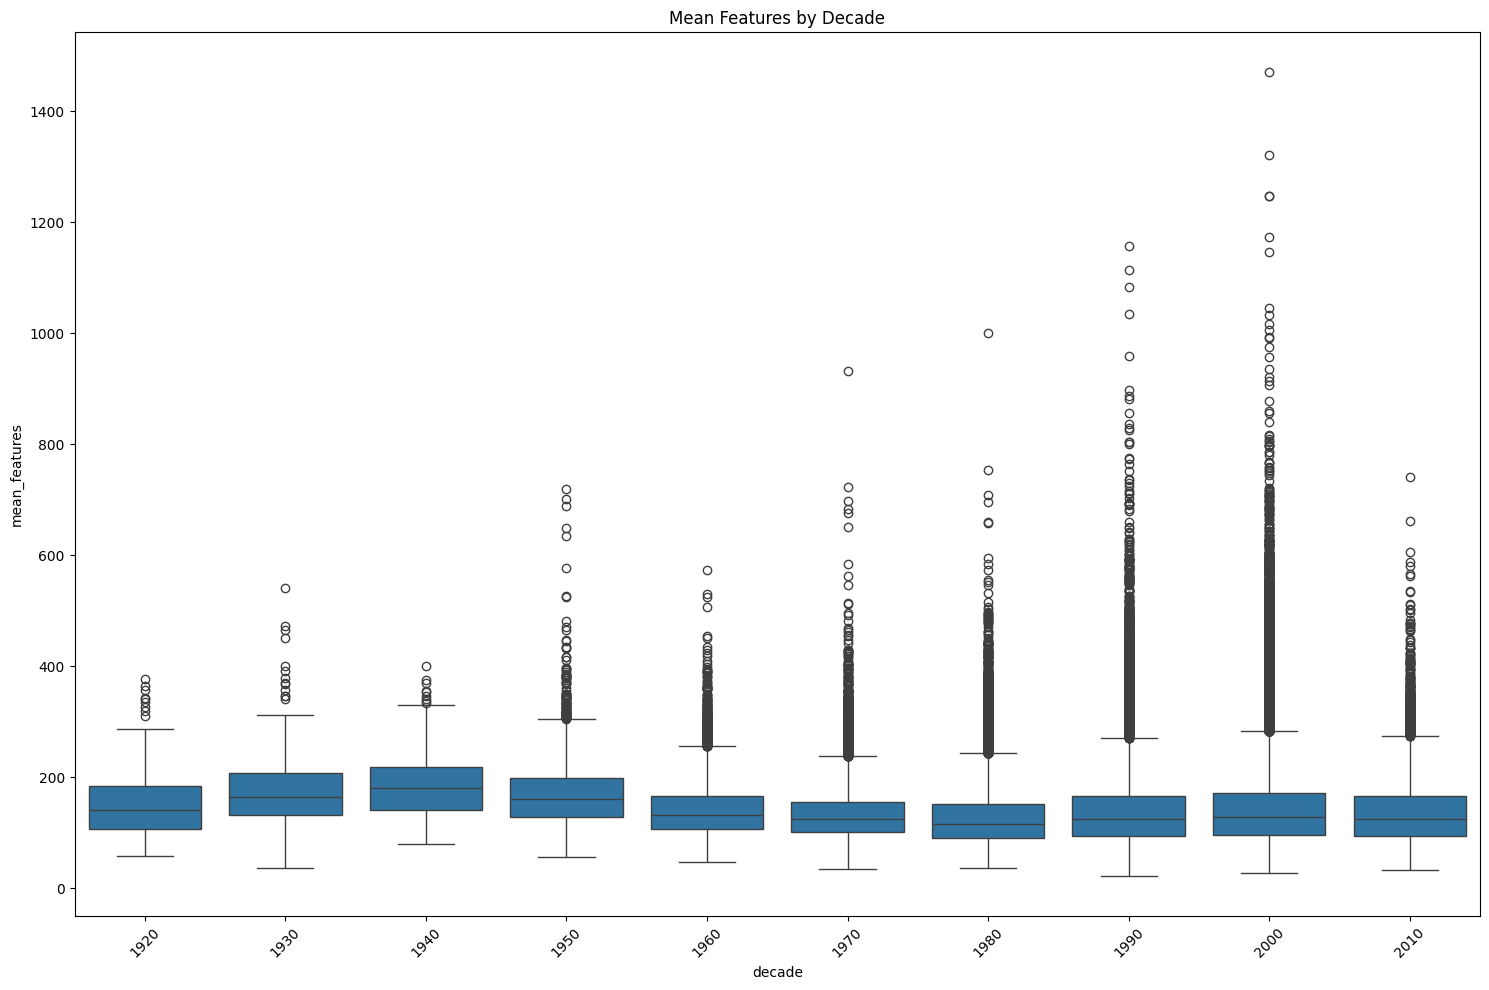

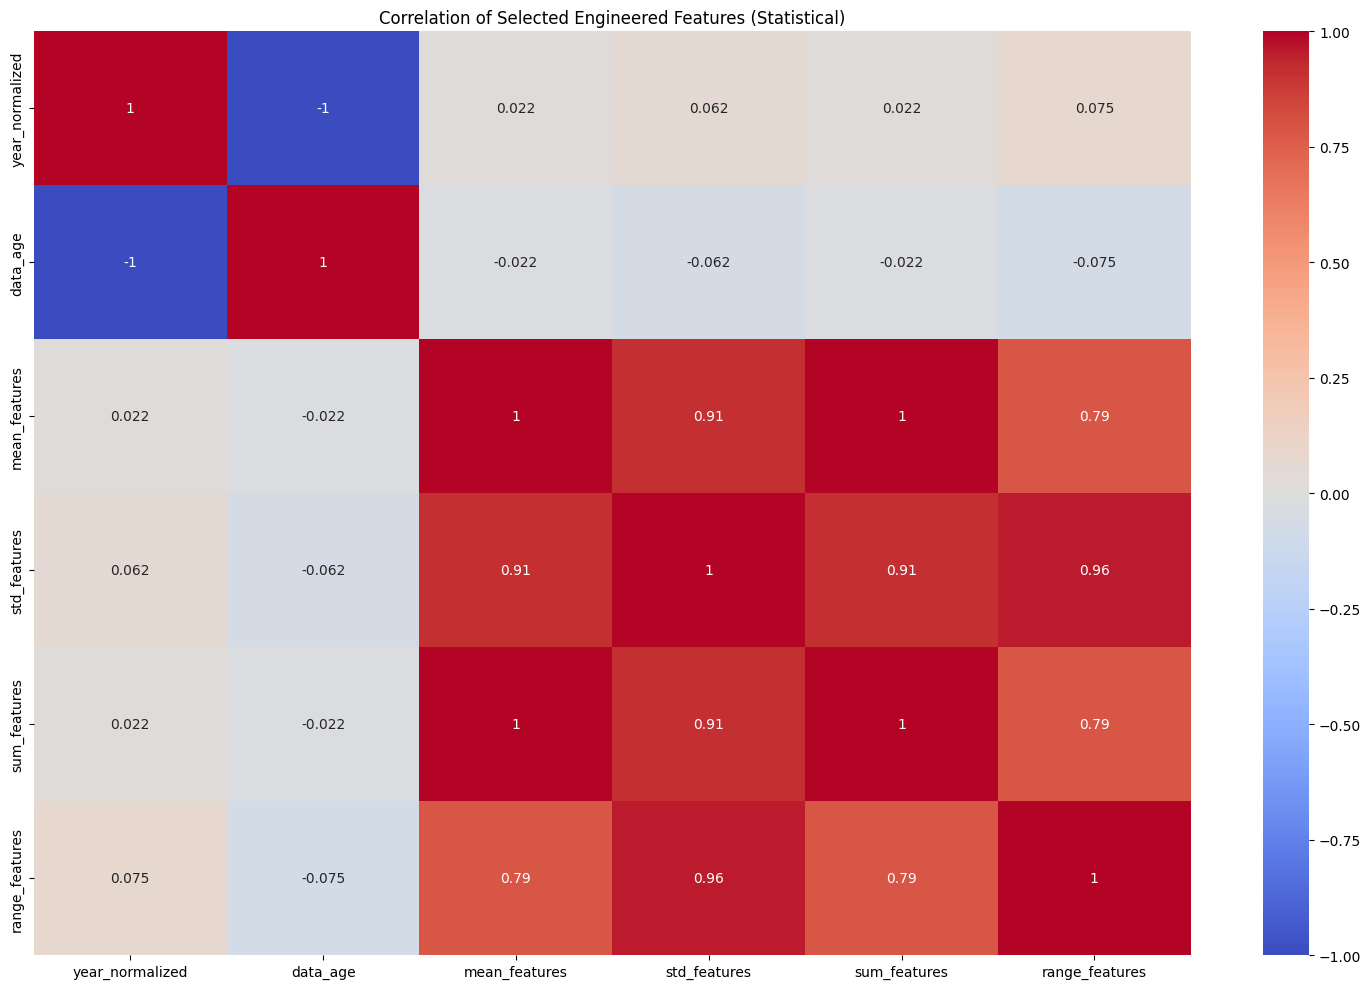

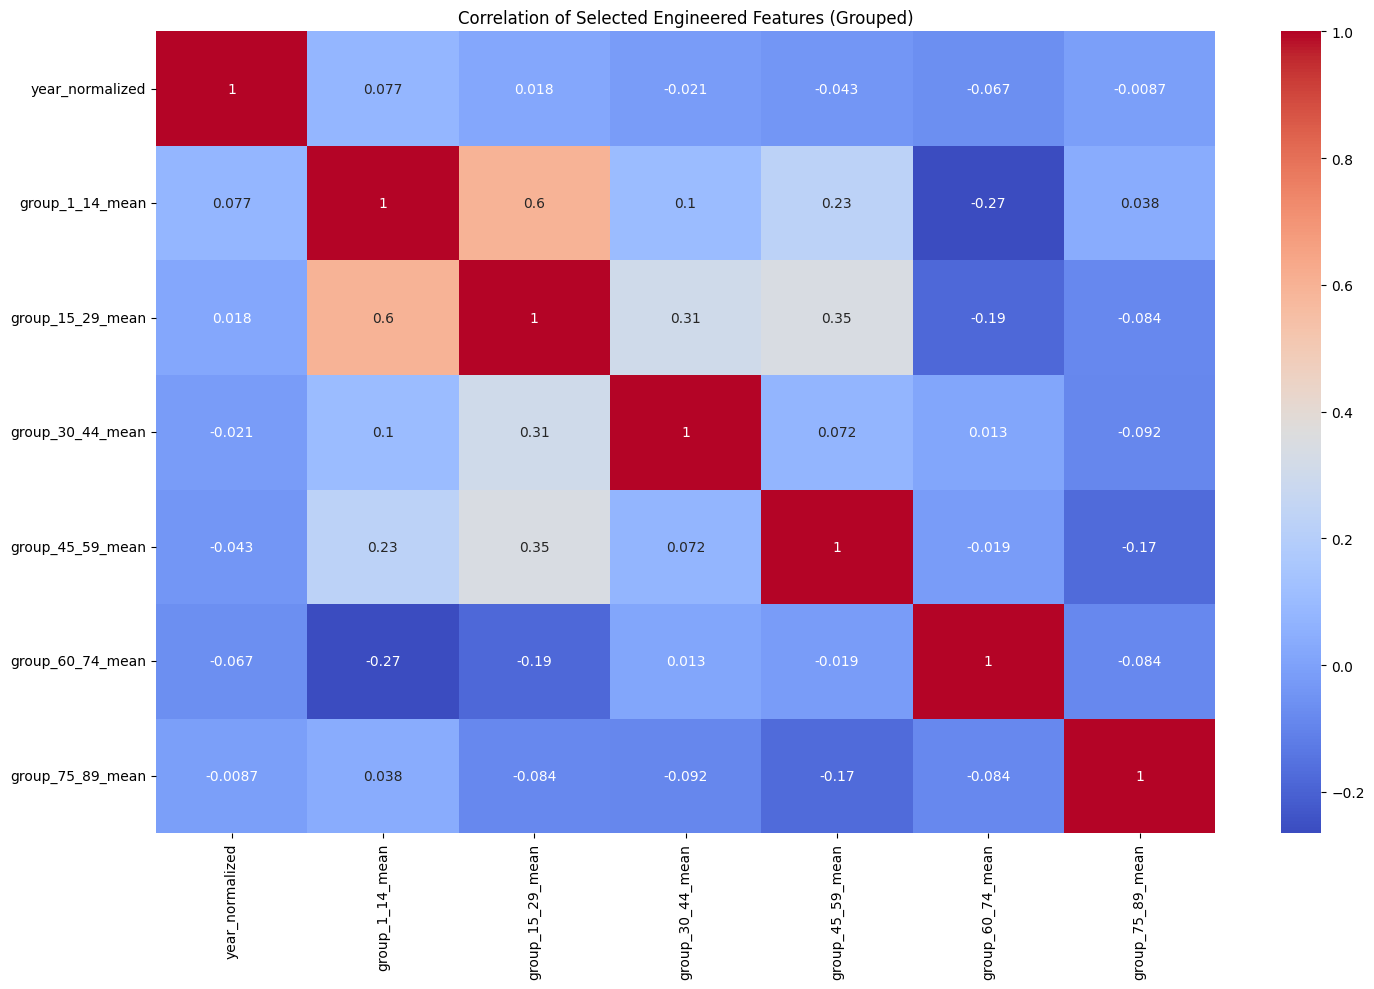

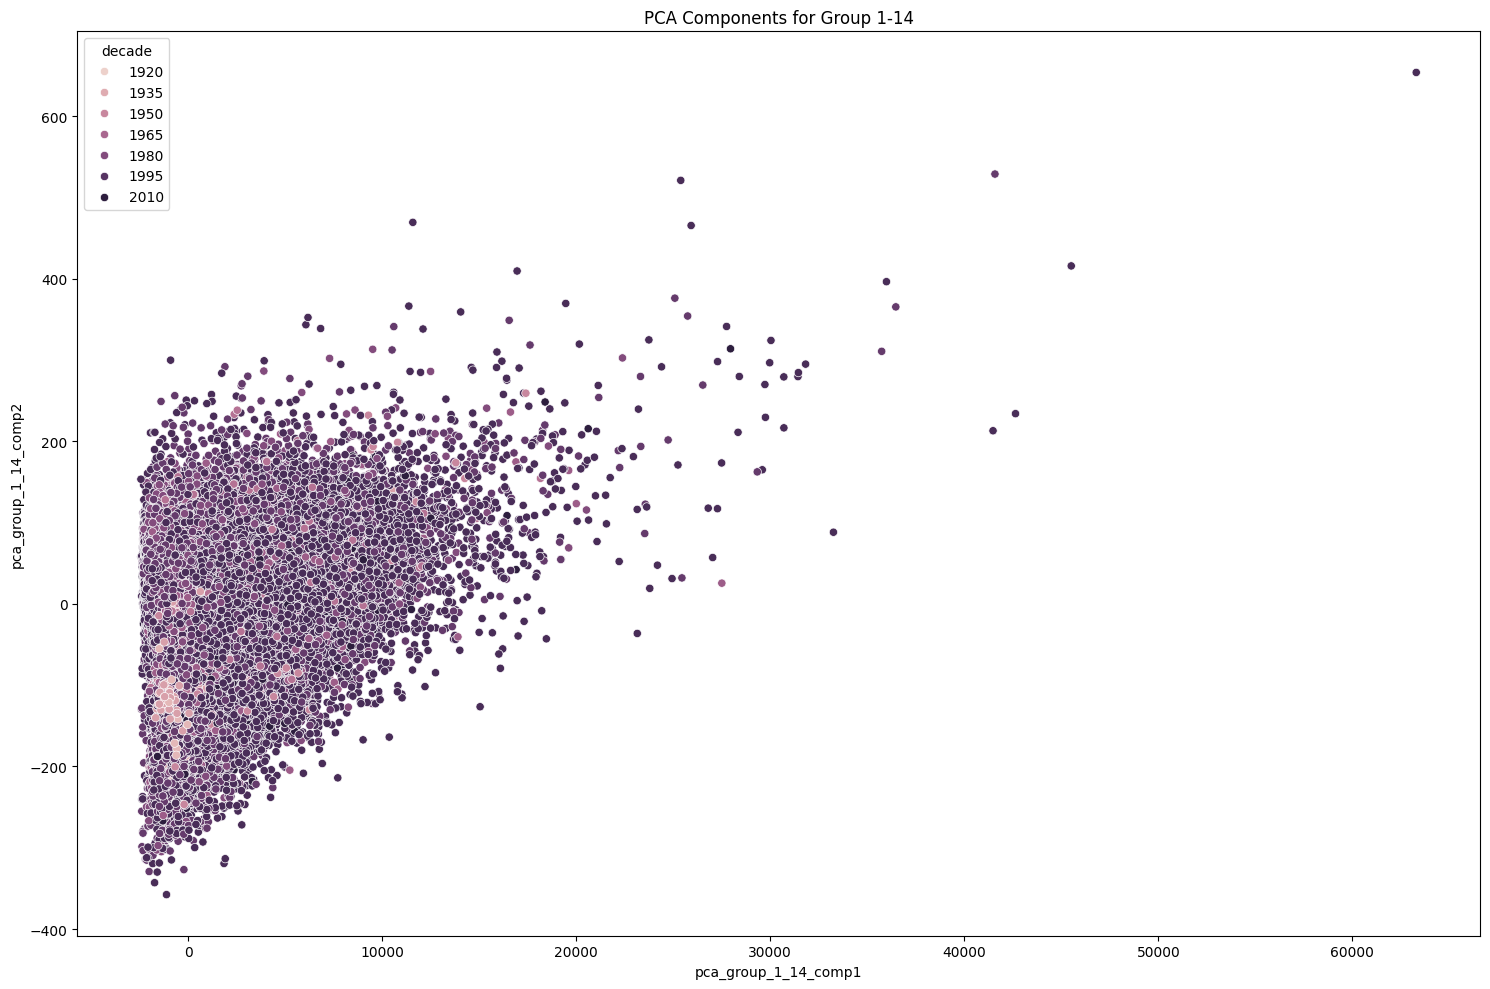

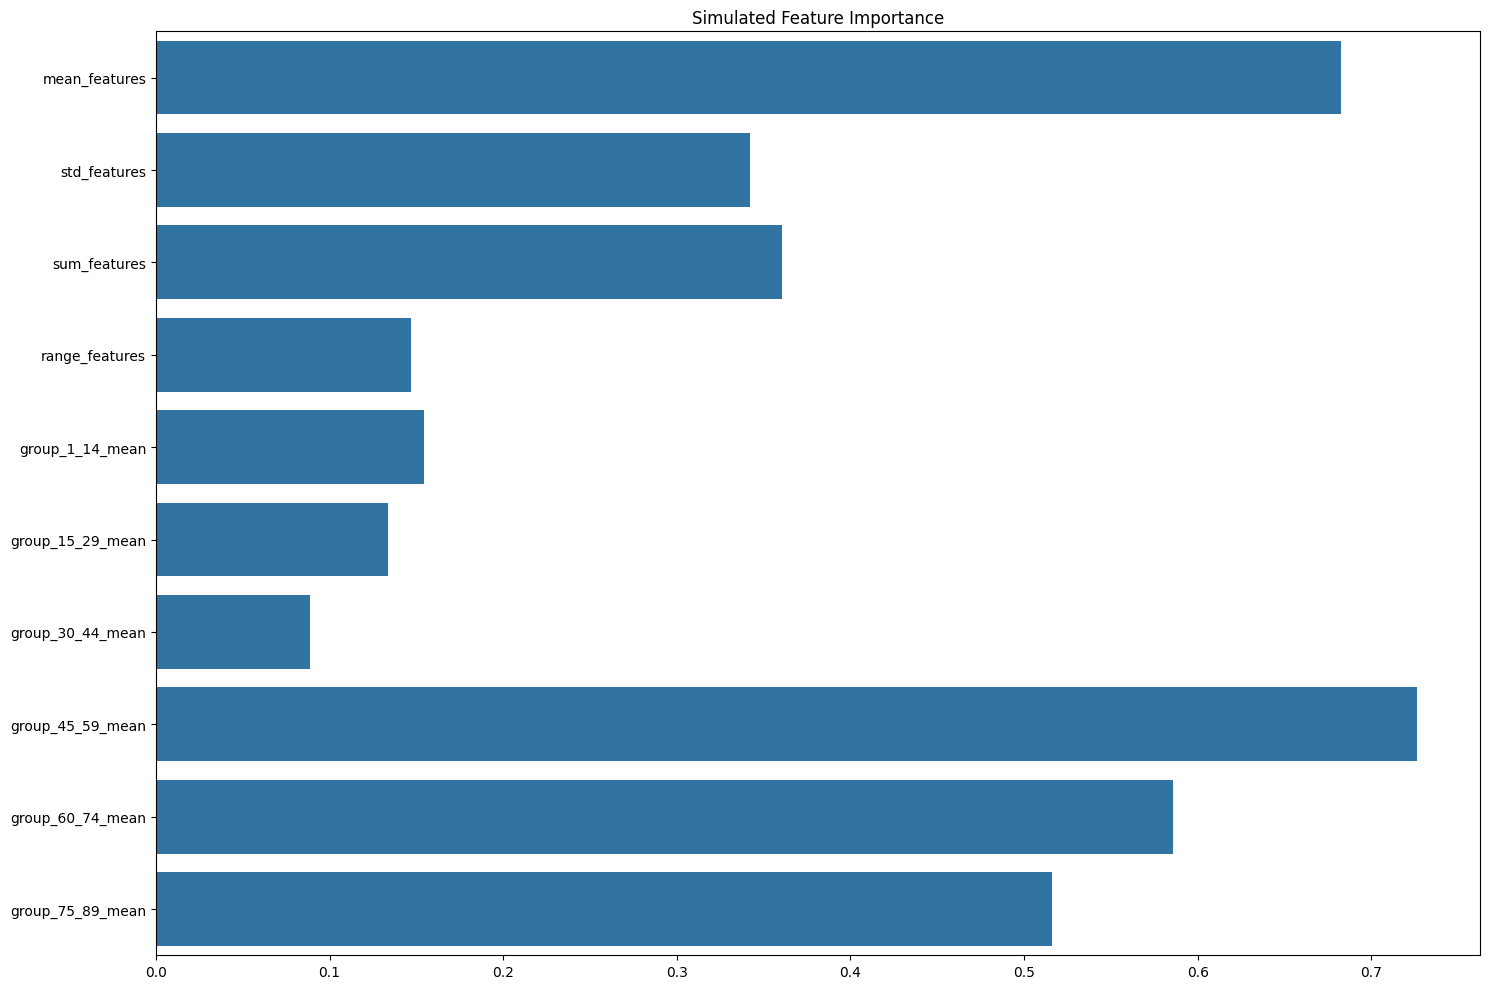


Training set: (412276, 541), Test set: (103069, 541)


In [6]:
# Display the engineered features
print("\nEngineered dataset shape:", df_engineered.shape)
print("\nEngineered features:")
print(df_engineered.columns.tolist())

# Save the engineered dataset
df_engineered.to_csv('Dataset/engineered_dataset.csv', index=False)
print("\nEngineered dataset saved to 'engineered_dataset.csv'")

# Save a sample of engineered dataset to a new CSV file
df_engineered_sample = df_engineered.sample(n=20, random_state=42)
df_engineered_sample.to_csv('RegresiUTSTelkom_engineered_sample.csv', index=False)

# Visualization of some of the engineered features
def visualize_engineered_features(df):
    plt.figure(figsize=(15, 10))

    # Plot distribution of year-related features
    sns.boxplot(x='decade', y='mean_features', data=df)
    plt.title('Mean Features by Decade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('mean_features_by_decade.png')
    plt.show()

    # Correlation of engineered features (using statistical features)
    plt.figure(figsize=(15, 10))
    # Select a subset of engineered features to avoid overcrowding
    engineered_subset = ['year_normalized', 'data_age', 'mean_features',
                         'std_features', 'sum_features', 'range_features']
    correlation = df[engineered_subset].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation of Selected Engineered Features (Statistical)')
    plt.tight_layout()
    plt.savefig('correlation_engineered_statistical_features.png')
    plt.show()

    # Correlation of engineered features (using grouped features)
    plt.figure(figsize=(15, 10))
    # Select a subset of engineered features to avoid overcrowding
    engineered_subset = ['year_normalized', 'group_1_14_mean', 'group_15_29_mean',
                         'group_30_44_mean', 'group_45_59_mean', 'group_60_74_mean', 'group_75_89_mean']
    correlation = df[engineered_subset].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation of Selected Engineered Features (Grouped)')
    plt.tight_layout()
    plt.savefig('correlation_engineered_grouped_features.png')
    plt.show()

    # Plot PCA components
    plt.figure(figsize=(15, 10))
    if 'pca_group_1_14_comp1' in df.columns and 'pca_group_1_14_comp2' in df.columns:
        sns.scatterplot(x='pca_group_1_14_comp1', y='pca_group_1_14_comp2',
                      hue='decade', data=df)
        plt.title('PCA Components for Group 1-14')

    plt.tight_layout()
    plt.savefig('pca_group_1_14.png')
    plt.show()

    # Feature importance (simulation - would normally use model coefficients)
    plt.figure(figsize=(15, 10))
    # Take sample of numeric features as a proxy for importance
    sample_features = ['mean_features', 'std_features', 'sum_features',
                       'range_features', 'group_1_14_mean', 'group_15_29_mean',
                          'group_30_44_mean', 'group_45_59_mean', 'group_60_74_mean', 'group_75_89_mean']
    importance = np.random.rand(len(sample_features))
    sns.barplot(x=importance, y=sample_features)
    plt.title('Simulated Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

# Visualize some of the engineered features
visualize_engineered_features(df_engineered)

# Prepare data for ML models (splitting into features and target)
def prepare_for_ml(df, target_col=90):
    # Separate features and target
    X = df.drop(columns=[target_col, 'index'])
    y = df[target_col]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepare_for_ml(df_engineered)
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")

## 5. Menyiapkan Fungsi Evaluasi

In [7]:
def evaluate_metrics_regression(y_true, y_pred):
    # Menghitung metrik evaluasi
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return {
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'mae': mae
    }

def evaluate_metrics_classification(y_true, y_pred, y_prob, num_classes):
    y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)
    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc_score = roc_auc_score(y_true_one_hot, y_prob, average='macro', multi_class='ovr')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc_score
    }

## 6. Menyiapkan Fungsi Visualisasi untuk Evaluasi

In [8]:
def visualize_results(history):
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Fungsi untuk menampilkan ROC curve
def visualize_roc_curve(y_true, y_scores):
    # Binarize the output
    n_classes = y_scores.shape[1]
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for a specific class (e.g., class 1)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr[1], tpr[1], label=f'ROC curve (area = {roc_auc[1]:.2f})')  # Example: Plotting for class 1
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('roc_curve.png')
    plt.show()

def visualize_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10)) # Increase figure size
    plt.matshow(cm, cmap='Blues', fignum=1)
    plt.colorbar()
    plt.title('Confusion Matrix')

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(range(len(class_names)), class_names, rotation=90, fontsize=8) # Rotate x-axis labels
    plt.yticks(range(len(class_names)), class_names, fontsize=8) # Adjust y-axis label font size
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()


## B. MLP Dengan Tensorflow

### 1. Penyusunan Model Neural Network


In [9]:
# Model untuk regresi
reg_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Model untuk klasifikasi
class_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

I0000 00:00:1746291324.633850   15115 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


### 2. Kompilasi Model

In [10]:
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

class_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3. Pelatihan Model

In [ ]:
# Callbacks untuk optimasi training
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6),
    ModelCheckpoint('best_regularized_model.keras', save_best_only=True)
]

# Training model
reg_history = reg_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

class_history = class_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10


I0000 00:00:1746291330.698756   16296 service.cc:152] XLA service 0x7fb31000dc60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746291330.698860   16296 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-05-03 23:55:30.754739: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746291330.931512   16296 cuda_dnn.cc:529] Loaded cuDNN version 90300


   67/10307 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1.6770 - mae: 0.9055

I0000 00:00:1746291332.472703   16296 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 0.9943 - mae: 0.6529 - val_loss: 0.8607 - val_mae: 0.5659 - learning_rate: 0.0010
Epoch 2/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.8085 - mae: 0.5721 - val_loss: 1.0648 - val_mae: 0.5810 - learning_rate: 0.0010
Epoch 3/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.7550 - mae: 0.5538 - val_loss: 1.1463 - val_mae: 0.5329 - learning_rate: 0.0010
Epoch 4/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.7230 - mae: 0.5420 - val_loss: 1.1409 - val_mae: 0.5314 - learning_rate: 0.0010
Epoch 5/10
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.6861 - mae: 0.5313 - val_loss: 1.6865 - val_mae: 0.5331 - learning_rate: 0.0010
Epoch 6/10
 8536/10307 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6589 - mae: 0.5248

### 4. Mengevaluasi Model dengan Menghitung Akurasi, Presisi, Recall, F1Squared, ROC, dan AUC-ROC

In [ ]:
a
# Evaluasi model
reg_train_loss, reg_train_mae = reg_model.evaluate(X_train, y_train, verbose=1)
class_test_loss, class_test_accuracy = class_model.evaluate(X_test, y_test, verbose=1)

print(f"Train MAE: {reg_train_mae:.4f}")
print(f"Test loss: {class_test_loss:.4f}")
print(f"Test accuracy: {class_test_accuracy:.4f}")

# Prediksi
y_reg_train = reg_model.predict(X_train)
y_reg_test = reg_model.predict(X_test)
y_class_train = class_model.predict(X_train)
y_class_test = class_model.predict(X_test)
y_class_test_prob = class_model.predict(X_test)
y_class_test = (y_class_test > 0.5).astype(int)

# Evaluasi metrik regresi
reg_results = evaluate_metrics_regression(y_train, y_reg_train)
print("\nHasil evaluasi regresi:")
print(f"MSE: {reg_results['mse']:.4f}")
print(f"RMSE: {reg_results['rmse']:.4f}")
print(f"R2: {reg_results['r2']:.4f}")
print(f"MAE: {reg_results['mae']:.4f}")

# Evaluasi metrik klasifikasi
class_results = evaluate_metrics_classification(y_test, y_class_test, y_class_test_prob, num_classes=2)
print("\nHasil evaluasi klasifikasi:")
print(f"Accuracy: {class_results['accuracy']:.4f}")
print(f"Precision: {class_results['precision']:.4f}")
print(f"Recall: {class_results['recall']:.4f}")
print(f"F1 Score: {class_results['f1']:.4f}")
print(f"AUC: {class_results['auc']:.4f}")


### 5. Memvisualisasikan Prediksi dari model yang telah dilatih

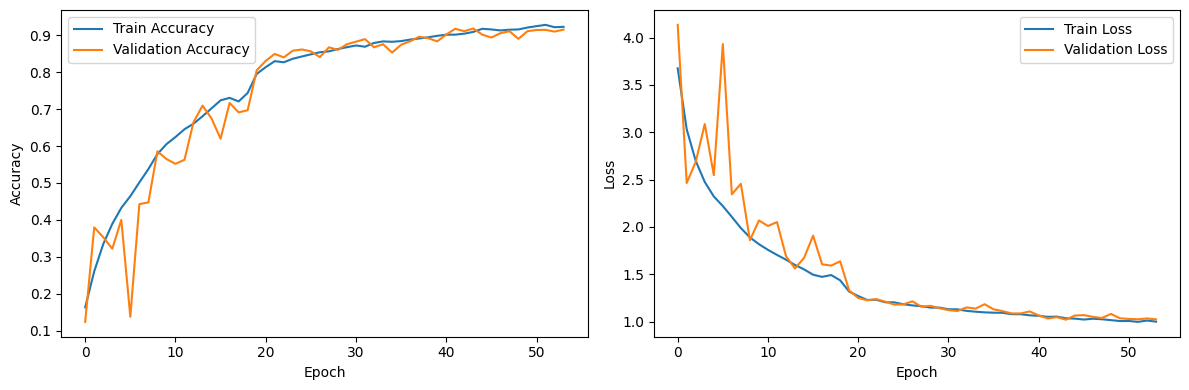

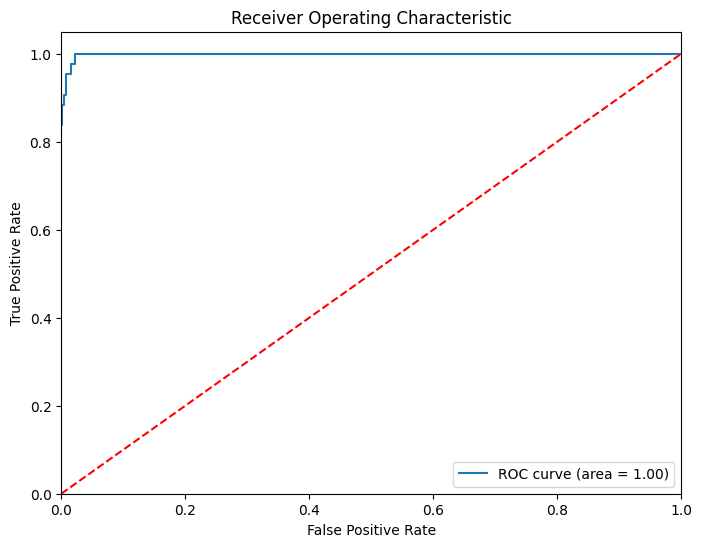

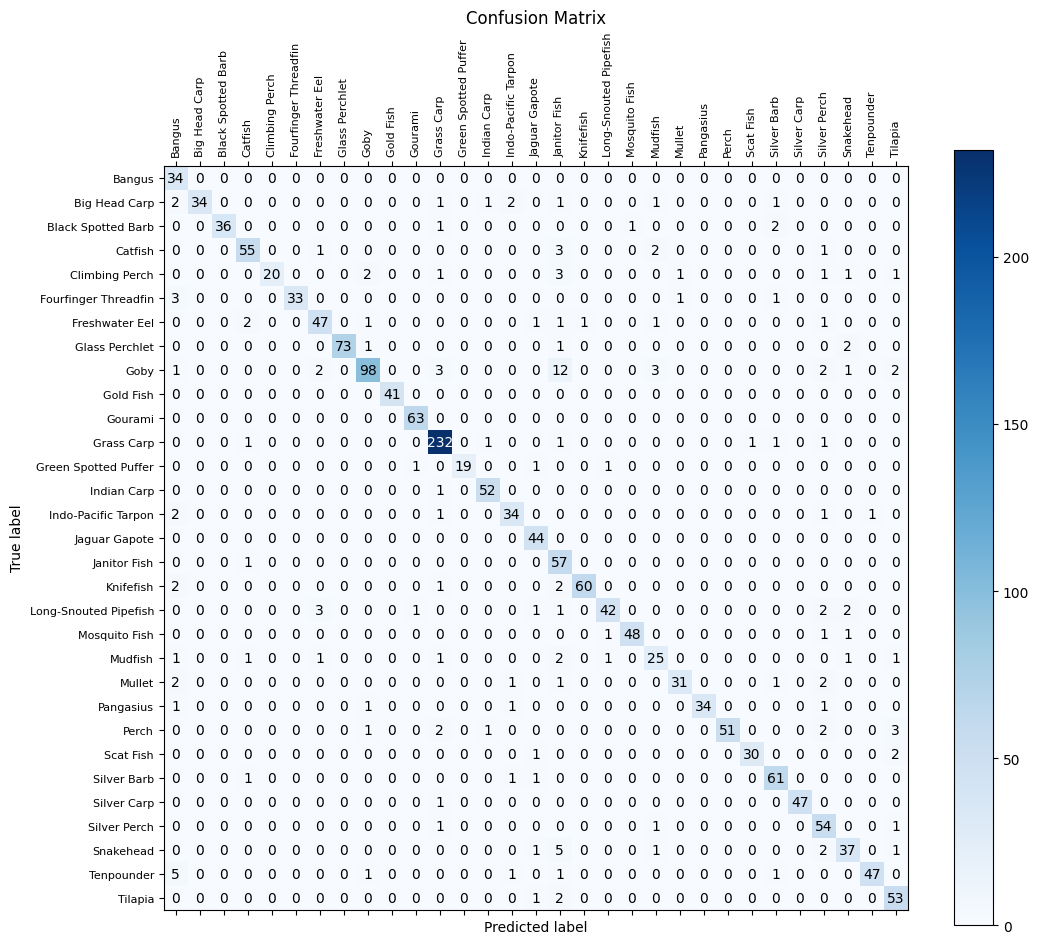

In [ ]:
# Plot training histories
visualize_results(reg_history)
visualize_results(class_history)

# Plot ROC curve
visualize_roc_curve

# Plot confusion matrix
visualize_confusion_matrix(y_test, y_class_test, class_names=['Class 0', 'Class 1'])

### 6. Menyimpan Model

In [ ]:
# Menyimpan model
reg_model.save('regression_model.keras')
class_model.save('classification_model.keras')
print("Models saved as 'regression_model.keras' and 'classification_model.keras'")

NameError: name 'reg_model' is not defined

# Penjelasan Teori dalam Pemodelan Menggunakan Multi-Layer Perceptron

## Data Preprocessing dan Feature Engineering

## Penjelasan Dasar Teori dan Persamaan Matematika dalam Model MLP

### 1. Fully Connected Layer
MLP menggunakan lapisan fully-connected, yang didefinisikan sebagai:

$$z = W \cdot a^{[-1]} + b$$
$$a = g(z)$$

dimana:
- $W$ adalah matriks bobot untuk lapisan fully connected
- $a^{[-1]}$ adalah aktivasi dari lapisan sebelum lapisan fully connected
- $b$ adalah vektor bias
- $g$ adalah fungsi aktivasi (seperti ReLU)
- $z$ adalah input terbobot
- $a$ adalah output lapisan fully connected

### 2. Aktivasi ReLU (Rectified Linear Unit)

Fungsi aktivasi ReLU yang digunakan dalam model didefinisikan sebagai:

$$f(x) = \max(0, x)$$

ReLU akan mengubah semua nilai negatif menjadi 0, sementara nilai positif tetap tidak berubah. Ini membantu model untuk belajar fungsi non-linear dan mengatasi masalah vanishing gradient.

### 3. Batch Normalization

Batch Normalization digunakan untuk menstabilkan dan mempercepat proses pembelajaran dengan menormalkan aktivasi di setiap lapisan. Rumus matematisnya adalah:

$$\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}​$$

$$y_i = \gamma \cdot \hat{x}_i + \beta$$

dimana:
- $x_i$ adalah input ke batch normalization
- $\mu_B$ adalah rata-rata mini-batch
- $\sigma_B^2$ adalah varians mini-batch
- $\epsilon$ adalah konstanta kecil untuk stabilitas numerik
- $\gamma$ dan $\beta$ adalah parameter yang dipelajari
- $y_i$ adalah output batch normalization

### 5. Dropout

Dropout adalah teknik regularisasi yang mencegah overfitting dengan secara acak mematikan neuron selama training. Secara matematis, untuk setiap neuron:

$$\begin{cases}
x/p & \text{dengan probabilitas } p \\
0 & \text{dengan probabilitas } 1-p
\end{cases}$$

dimana $p$ adalah probabilitas mempertahankan (keep probability) dan $1-p$ adalah dropout rate.

### 7. Fungsi Loss Cross-Entropy
Cross-entropy loss yang digunakan untuk klasifikasi multi-kelas didefinisikan sebagai:

$$L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(p_{i,c})$$

dimana:
- $N$ adalah jumlah sampel
- $C$ adalah jumlah kelas
- $y_{i,c}$ adalah indikator (0 atau 1) apakah kelas c adalah label yang benar untuk sampel i
- $p_{i,c}$ adalah probabilitas yang diprediksi bahwa sampel i adalah kelas c

### 8. Optimizer Adam
Adam (Adaptive Moment Estimation) adalah algoritma optimasi yang menggabungkan RMSprop dan momentum. Adam memperbarui bobot menggunakan rangkaian rumus:

Update momentum:
$$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

Update velocity:
$$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

Koreksi bias:
$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

Update parameter:
$$\theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

dimana:
- $g_t$ adalah gradien pada waktu t
- $m_t$ dan $v_t$ adalah estimasi momen pertama dan kedua
- $\hat{m}_t$ dan $\hat{v}_t$ adalah estimasi momen yang dikoreksi
- $\alpha$ adalah learning rate
- $\beta_1$ dan $\beta_2$ adalah exponential decay rates
- $\epsilon$ adalah konstanta kecil untuk stabilitas numerik
- $\theta_t$ adalah parameter yang diperbarui

### 9. Softmax
Fungsi softmax digunakan pada output layer untuk mengubah logits menjadi probabilitas yang berjumlah 1:

$$\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{k} e^{x_j}}$$

dimana $x_i$ adalah nilai logit untuk kelas i dan k adalah jumlah kelas.

### 10. Learning Rate Decay (ReduceLROnPlateau)

Mengurangi learning rate ketika metrik pembelajaran stagnan:
$$ \alpha_{\text{new}} = \alpha_{\text{old}} \times \text{factor}$$
Dimana factor biasanya 0.1

## Penjelasan Metrik Evaluasi:
### Akurasi

$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}} $$

Menunjukkan seberapa sering model memprediksi dengan benar.


### Presisi

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

Menunjukkan seberapa andal model memprediksi nilai positif secara benar (dibandingkan dengan positif palsu).


### Recall (Sensitivity)

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

Menunjukkan seberapa baik model menangkap kelas positif dengan benar (dengan memperhatikan nilai positif yang terprediksi negatif atau false negative).


### F1-Score

$$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Rata-rata harmonik antara presisi dan recall.


### ROC (Receiver Operating Characteristic) Curve

ROC Curve memplot hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR):

$$ \text{True Positive Rate (TPR)} = \text{Recall} $$

$$ \text{False Positive Rate (FPR)} = \frac{\text{False Positives}}{ \text{False Positives} + \text{True Negatives}} $$


### AUC-ROC

$$ AUC = \int_{0}^{1} TPR(x) \, dx $$

AUC (Area Under Curve) adalah area di bawah kurva ROC (Receiver Operating Characteristic)

## Analisis Matriks Evaluasi Terbaik
Untuk kasus klasifikasi gambar ikan, matriks evaluasi terbaik tergantung pada kebutuhan spesifik, namun secara umum:

*F1-Score merupakan matriks yang sangat informatif*, karena:

- Menyeimbangkan precision (yang fokus terhadap false positive) dan recall (fokus terhadap false negative).
- Sangat berguna jika dataset tidak seimbang antar kelas
Memberikan gambaran keseluruhan performa model


*AUC-ROC juga sangat penting*, karena:

- Mengukur kemampuan model membedakan antar kelas
Tidak terpengaruh oleh threshold klasifikasi
Ideal untuk perbandingan model secara keseluruhan


Confusion Matrix memberikan insight paling detail tentang:

- Jenis kesalahan yang dilakukan model
- Kelas mana yang sering salah diklasifikasikan
- Pola kesalahan yang mungkin menunjukkan kelemahan model

Akurasi, meskipun mudah diinterpretasi, bisa menyesatkan jika dataset tidak seimbang. Oleh karena itu, evaluasi terbaik adalah kombinasi dari beberapa matriks, dengan penekanan pada F1-Score untuk keseimbangan dan confusion matrix untuk analisis detail.